In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [76]:
gene = "PsbS"
# gene = "SBPase"
# gene = "Raf1"

checkpoint = "checkpoints_epoch/GPN_Brassicales/30_epochs/42/checkpoint-1855"

V = pd.read_parquet(
    f"../../results/experimental_data/preds/{gene}/{checkpoint}.parquet"
)
V

,beta,pval,n,ref,pos,alt,mut_type,ref2,pred_lfc
0,2.091968,3.694932e-11,2.0,C,-129.0,______________________________________________...,deletion,C,-1.56250
1,1.884236,5.013804e-39,4.0,I,-70.0,AATATGGATAAGG,insertion,T,-0.40625
2,1.728034,8.120290e-11,4.0,I,-60.0,AATATGGATAAGG,insertion,C,-0.46875
3,1.697143,3.735748e-12,1.0,C,-90.0,______________________________________________...,deletion,C,-0.34375
4,1.585929,1.404440e-19,2.0,I,-55.0,CCTTATCCATATT,insertion,C,-0.25000
...,...,...,...,...,...,...,...,...,...
2852,-1.444309,6.979361e-08,1.0,I,-85.0,CAACACAGCCGCTG,insertion,G,-0.56250
2853,-1.509832,1.635524e-12,2.0,I,-169.0,G,insertion,G,-1.53125
2854,-1.572860,2.222118e-02,1.0,I,-96.0,CCCACCGGCGGG,insertion,C,-0.56250
2855,-1.581708,2.154937e-08,1.0,I,-201.0,G,insertion,G,-0.12500


In [5]:
V = V[V.n >= 5]
V

,beta,pval,n,ref,pos,alt,mut_type,ref2,pred_lfc
6,1.562321,7.316581e-30,5.0,A,-101.0,__,deletion,A,-0.40625
14,1.372471,9.258762e-03,9.0,I,-223.0,A,insertion,T,-0.06250
27,1.011442,6.721697e-28,10.0,T,-34.0,__,deletion,T,-0.12500
32,0.917913,1.505149e-09,6.0,C,-33.0,_,deletion,C,-0.06250
43,0.764722,4.726911e-11,5.0,I,-102.0,AAAAACAA,insertion,A,-0.71875
...,...,...,...,...,...,...,...,...,...
2815,-0.907717,2.384073e-20,8.0,C,-162.0,__,deletion,C,-1.93750
2816,-0.908355,5.772749e-17,6.0,C,-173.0,____________,deletion,C,-1.96875
2818,-0.919789,2.541083e-28,14.0,G,-174.0,____________,deletion,G,-2.03125
2821,-0.932932,1.792698e-12,6.0,I,-145.0,CAGAAAAAAAAAAGA,insertion,C,-1.06250


In [7]:
# V = V[V.split == "test"]
# V = V[V.split == "validation"]
# V = V[V.pos < -128]
# V = V[V.pos >= -128]
# V = V[V.pos < -50]
# V = V[V.pos >= -50]
len(V)

1127

In [8]:
V["qval"] = multipletests(V["pval"], method="fdr_bh")[1]
(V.qval < 0.05).mean()

/tmp/ipykernel_463817/3101694164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V['qval'] = multipletests(V['pval'], method='fdr_bh')[1]


0.36202307009760426

In [9]:
def plot_comparison(V):
    plt.figure(figsize=(2, 2))
    g = sns.scatterplot(
        data=V,
        x="beta",
        y="pred_lfc",
        # hue="pos"
    )
    # sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    pearson = pearsonr(V["beta"], V["pred_lfc"])
    spearman = spearmanr(V["beta"], V["pred_lfc"])
    print(pearson, spearman)
    pearson_sig = "sig" if pearson[1] < 0.05 else "non-sig"
    spearman_sig = "sig" if spearman[1] < 0.05 else "non-sig"
    plt.title(
        f"Pearson: {pearson[0]:.2f} ({pearson_sig})\nSpearman: {spearman[0]:.2f} ({spearman_sig})"
    )
    sns.despine()

PearsonRResult(statistic=0.454404648229229, pvalue=1.650283245950212e-58) SignificanceResult(statistic=0.38532828121273693, pvalue=3.337839723881271e-41)


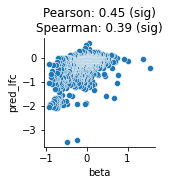

In [10]:
plot_comparison(V)

PearsonRResult(statistic=0.7687749923281038, pvalue=8.589949181237775e-28) SignificanceResult(statistic=0.6821145195368185, pvalue=6.089509505787685e-20)


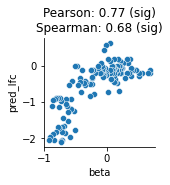

In [11]:
plot_comparison(V[(V.mut_type == "deletion") & (V.alt.str.len() == 12)])